##### Ignore

In [48]:
import warnings
warnings.filterwarnings("ignore")

## Import libraries

In [49]:
from arcgis.gis import GIS
from arcgis.map import Map

## Connect to _source_ and _target_ GIS organizations

In [55]:
target = GIS(profile="webapps_admin")
source = GIS(profile="your_online_admin_profile")

In [ ]:
print(source)

In [ ]:
source.users.me.username

In [ ]:
print(target)

## Search for a _Feature Layer_ to clone

In [56]:
hifld_pplant_items = source.content.search(query=f"title: * Power Plants AND owner:{source.users.me.username}", 
                                        item_type="Feature Layer")
hifld_pplant_items

[<Item title:"US Power Plants" type:Feature Layer Collection owner:ArcGISPyAPIBot>]

<Item title:"US Power Plants" type:Feature Layer Collection owner:ArcGISPyAPIBot>
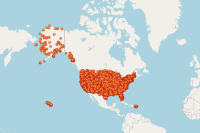

In [57]:
hifld_pplant_item = hifld_pplant_items[0]
hifld_pplant_item

In [ ]:
hifld_pplant_item.id

### Print information about the _Feature Layer_

In [ ]:
hifld_pplant_item.layers

In [ ]:
print(f"{'Hosted Feature Layer:':35}{hifld_pplant_item.title}\n{'-'*80}")
print(f"{' '*2}{'item id:':20}{hifld_pplant_item.id}")
print(f"{' '*2}individual layer urls:")
for flyr in hifld_pplant_item.layers:
    print(f"{' '*4}{flyr.url}")

In [61]:
hifld_pplant_item.typeKeywords

['ArcGIS Server',
 'Data',
 'Feature Access',
 'Feature Service',
 'Metadata',
 'Service',
 'Singlelayer',
 'Hosted Service']

### Visualize the _Feature Layer_

In [62]:
map1 = Map("United States", gis=source)
map1

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

In [63]:
map1.content.add(hifld_pplant_item)

## Clone the _Feature Layer_

In [65]:
try:
    if not target.content.folders.get("power_plant_data"):
        target.content.folders.create("power_plant_data")
    cloned_flyr_item = target.content.clone_items(items=[hifld_pplant_item],
                                                  folder="power_plant_data")[0]
except Exception as e:
    print("Failed to clone.")
    print(str(e))

### Print information about the cloned _Feature Layer_

<Item title:"US Power Plants" type:Feature Layer Collection owner:tkukreja_pythonapi>
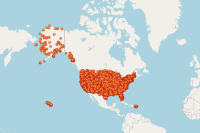

In [73]:
cloned_flyr_item

In [ ]:
print(f"{'Hosted Feature Layer:':35}{cloned_flyr_item.title}\n{'-'*80}")
print(f"{' '*2}{'item id:':20}{cloned_flyr_item.id}")
print(f"{' '*2}individual layer urls:")
for flyr in cloned_flyr_item.layers:
    print(f"{' '*4}{flyr.url}")

In [75]:
cloned_flyr_item.typeKeywords

['ArcGIS Server',
 'Data',
 'Feature Access',
 'Feature Service',
 'Metadata',
 'Service',
 'Singlelayer',
 'source-510f3339e276412e9462c0fc9dcdf205',
 'Hosted Service']

### Visualize the cloned _Feature Layer_

In [76]:
map2 = Map("United States", gis=target)
map2.content.add(cloned_flyr_item)
map2

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…